In [52]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import *
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest,chi2,RFE
from sklearn.ensemble import RandomForestClassifier
import plotly.figure_factory as ff
%matplotlib inline

In [53]:
method = False
nClust=6



In [54]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('drive/MyDrive/ColabNotebooks/binary.dat', sep=';')
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q
0,ecoli1,0,1,1,1,0,0,0,1,0,0,0,0,0,0,1,1
1,ecoli2,0,1,0,1,1,0,0,1,0,0,0,0,0,0,1,0
2,ecoli3,1,1,0,1,1,0,0,1,0,0,0,0,0,0,1,1
3,styphi1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,styphi2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5,styphi3,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0
6,kpneu1,0,1,1,1,0,1,1,1,1,1,0,0,0,1,1,1
7,kpneu2,0,1,1,1,0,1,1,1,1,1,0,0,1,0,1,1
8,kpneu3,0,1,1,1,0,1,1,1,1,1,0,0,1,1,1,1
9,kpneu4,0,1,1,1,0,1,1,1,0,1,0,0,1,1,1,1




Значение метки "A":
pvul1      1
kpneu1     1
kpneu3     1
pmor2      1
smar       1
ecoli3     1
kpneu2     1
ecoli1     1
pvul3      1
ecoli2     1
styphi1    1
pmor1      1
styphi3    1
pvul2      1
kpneu5     1
kpneu4     1
styphi2    1
Name: A, dtype: int64


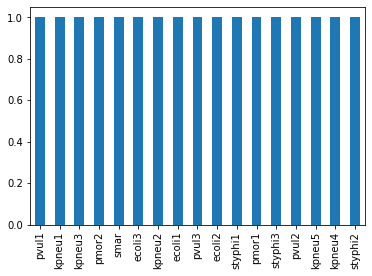

In [55]:
label = df["A"]
df.drop("A", axis=1, inplace=True)
print('\n\nЗначение метки "A":')
print(label.value_counts())
label.value_counts().plot(kind="bar")

In [56]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   B       17 non-null     int64
 1   C       17 non-null     int64
 2   D       17 non-null     int64
 3   E       17 non-null     int64
 4   F       17 non-null     int64
 5   G       17 non-null     int64
 6   H       17 non-null     int64
 7   I       17 non-null     int64
 8   J       17 non-null     int64
 9   K       17 non-null     int64
 10  L       17 non-null     int64
 11  M       17 non-null     int64
 12  N       17 non-null     int64
 13  O       17 non-null     int64
 14  P       17 non-null     int64
 15  Q       17 non-null     int64
dtypes: int64(16)
memory usage: 2.2 KB
None


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 <a list of 16 Text major ticklabel objects>)

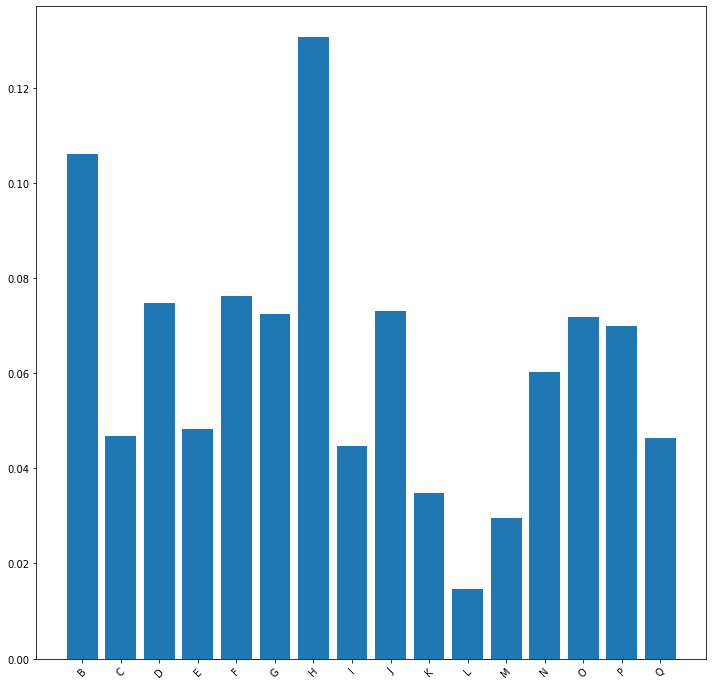

In [57]:
clf = RandomForestClassifier()
clf.fit(df, label)
# create a figure to plot a bar, where x axis is features, and Y indicating the importance of each feature
plt.figure(figsize=(12,12))
plt.bar(df.columns, clf.feature_importances_)
plt.xticks(rotation=45)

In [58]:
fig = ff.create_dendrogram(df)
fig.update_layout(width=800, height=500)
fig.show()

In [59]:
#Распределили объекты по кластерам
data_dist = pdist(df, 'euclidean')
data_linkage = linkage(data_dist, method='average')
clusters=fcluster(data_linkage, nClust, criterion='maxclust')
clusters

array([5, 5, 5, 4, 4, 4, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 6], dtype=int32)

In [60]:
# к оригинальным данным добавляем номер кластера
col=["B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L",
       "M", "N", "O", "P", "Q"]
df['Cluster']=clusters
res=df.groupby('Cluster')[col].mean()
res['Количество']=df.groupby('Cluster').size().values
res #ниже средние цифры по кластерам и количество объектов (Количество)

,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,Количество
Cluster,,,,,,,,,,,,,,,,,
1,0.000000,1.0,1.000000,1.0,0.000000,1.000000,0.800000,1.0,0.8,1.0,0.0,0.0,0.8,0.8,1.000000,1.000000,5
2,1.000000,0.0,0.000000,1.0,0.000000,0.333333,0.666667,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000,3
3,0.000000,0.0,0.500000,1.0,1.000000,0.000000,0.500000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000,2
4,0.333333,1.0,1.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.000000,3
5,0.333333,1.0,0.333333,1.0,0.666667,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.666667,3
6,0.000000,1.0,1.000000,0.0,1.000000,1.000000,0.000000,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.000000,1


In [62]:
#Import required module
from sklearn.cluster import KMeans
data = pd.read_csv('drive/MyDrive/ColabNotebooks/binary.dat', sep=';')
data.drop("A", axis=1, inplace=True)
pca = PCA(2)
df = pca.fit_transform(data)
df.shape
#Initialize the class object
kmeans = KMeans(n_clusters= 6)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)
 
print(label)

[0 5 5 4 4 4 2 2 2 2 2 1 3 1 3 3 0]


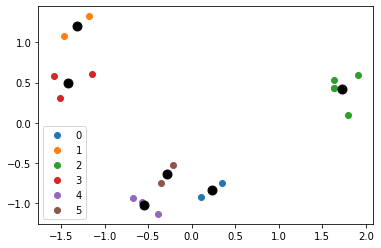

In [63]:
#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

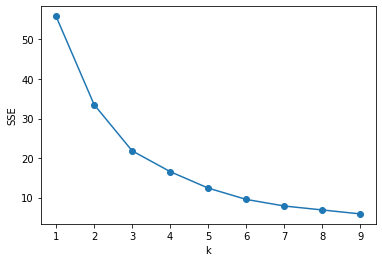

In [64]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
 
df_features = pd.read_csv('drive/MyDrive/ColabNotebooks/binary.dat', sep=';') 
df_features.drop("A", axis=1, inplace=True)
 
SSE = [] # хранить сумму квадратов ошибок для каждого результата
for k in range(1,10):
    estimator = KMeans (n_clusters = k) # построить кластер
    estimator.fit(df_features[['B', "C", "D", "E", "F", "G", "H", "I", "J", "K", "L",
       "M", "N", "O", "P", "Q"]])
    SSE.append(estimator.inertia_)
X = range(1,10)
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(X,SSE,'o-')

plt.show()